# Objective

# Workflow

* Requried python packages
* Paths/Lookups/Constants
* Load dataset

### Requried python packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import scipy.stats as st

### Paths/Lookups/Constants

In [3]:
input_path = "../data/data.csv"
excel_input_path = "../data/input_data.xlsx"
output_path = "../outputs/"

### Load datasets

In [4]:
data = pd.read_excel(excel_input_path)

In [13]:
data.head()

Short description  \
0                    login issue   
1                        outlook   
2             cant log in to vpn   
3  unable to access hr_tool page   
4                   skype error    

                                         Description             Caller  \
0  -verified user details.(employee# & manager na...  spxjnwir pjlcoqds   
1  \r\n\r\nreceived from: hmjdrvpb.komuaywn@gmail...  hmjdrvpb komuaywn   
2  \r\n\r\nreceived from: eylqgodm.ybqkwiam@gmail...  eylqgodm ybqkwiam   
3                      unable to access hr_tool page  xbkucsvz gcpydteq   
4                                       skype error   owlgqjme qhcozdfx   

  Assignment group  
0            GRP_0  
1            GRP_0  
2            GRP_0  
3            GRP_0  
4            GRP_0

#### Target distribution

In [14]:
data["Assignment group"].value_counts()

GRP_0     3976
GRP_8      661
GRP_24     289
GRP_12     257
GRP_9      252
          ... 
GRP_67       1
GRP_64       1
GRP_61       1
GRP_70       1
GRP_35       1
Name: Assignment group, Length: 74, dtype: int64

In [17]:
target_distribution = data["Assignment group"].value_counts().rename_axis("Assignment_group").reset_index(name='counts')

In [19]:
target_distribution["percentage"] = target_distribution["counts"] / len(data) * 100.0

In [20]:
target_distribution.head()

Assignment_group  counts  percentage
0            GRP_0    3976   46.776471
1            GRP_8     661    7.776471
2           GRP_24     289    3.400000
3           GRP_12     257    3.023529
4            GRP_9     252    2.964706

In [21]:
## Save file for visuvalization
# file_name = "target_distribution.csv"
# target_distribution.to_csv(output_path + file_name, index=False)

# Data preprocessing

In [6]:
data.columns.values

array(['Short description', 'Description', 'Caller', 'Assignment group'],
      dtype=object)

We have <b>3</b> features to assign the target class, out of which the featuare caller is not having any high level significance so <b>not considering</b> it for the model building.

### Handle Non cases

In [5]:
## Checking the non cases in all the fields of data
data.isna().sum()

Short description    8
Description          1
Caller               0
Assignment group     0
dtype: int64

We are having very limited amount of nan in the given data, in the <b>short description</b> filed we are having high number of nan case which are very in <b>limited percentage</b> when we consider with total data. 

So removing these <b>nan</b> case to make the data nan free data(not having the nan cases at all).

In [7]:
data.dropna(inplace = True)

Cross checking if we are still having any <b>nan</b> cases

In [8]:
data.isna().sum()

Short description    0
Description          0
Caller               0
Assignment group     0
dtype: int64

In [20]:
import re

# Removing the extra spaces lowering the text
# Removing unwanted characters
def text_preprocessing(text):
    
    text = text.lower()
    text = re.sub('[^\w\s]',' ', text)
    text = re.sub('\s+',' ',text)
    text = re.sub('\d+', '', text)
    text = text.strip()
    return text

In [10]:
data["Description"][0]

'-verified user details.(employee# & manager name)\r\n-checked the user name in ad and reset the password.\r\n-advised the user to login and check.\r\n-caller confirmed that he was able to login.\r\n-issue resolved.'

In [22]:
text_preprocessing(data["Description"][0])

'verified user details employee manager name checked the user name in ad and reset the password advised the user to login and check caller confirmed that he was able to login issue resolved'

#### Let's apply the text_preprocessing function on both the Description and Short description

In [25]:
data["updated_description"] = list(map(text_preprocessing, data["Description"]))

In [27]:
data["updated_short_description"] = list(map(text_preprocessing, data["Short description"]))

In [28]:
data.head()

Short description  \
0                    login issue   
1                        outlook   
2             cant log in to vpn   
3  unable to access hr_tool page   
4                   skype error    

                                         Description             Caller  \
0  -verified user details.(employee# & manager na...  spxjnwir pjlcoqds   
1  \r\n\r\nreceived from: hmjdrvpb.komuaywn@gmail...  hmjdrvpb komuaywn   
2  \r\n\r\nreceived from: eylqgodm.ybqkwiam@gmail...  eylqgodm ybqkwiam   
3                      unable to access hr_tool page  xbkucsvz gcpydteq   
4                                       skype error   owlgqjme qhcozdfx   

  Assignment group                                updated_description  \
0            GRP_0  verified user details employee manager name ch...   
1            GRP_0  received from hmjdrvpb komuaywn gmail com hell...   
2            GRP_0  received from eylqgodm ybqkwiam gmail com hi i...   
3            GRP_0                      unable to access hr_tool page   
4            GRP_0                                        skype error   

       updated_short_description  
0                    login issue  
1                        outlook  
2             cant log in to vpn  
3  unable to access hr_tool page  
4                    skype error

## Merge both Short description and Description

<p>From the data we observed cases where short description is <b>repeated</b> in description with out any changes, So while merging both short description and description we need check is the short description and description are <b>same or not</b>.</p>

<p> If both the description are same then use only one, else merge both. </b>

In [29]:
def merge_descriptions(short, large):
    
    descrition = large
    if short != large:
        descrition = short + " " + large
    return descrition
        

In [31]:
merge_descriptions("dfsdfdsfs", "dfsdfdsfs")

'dfsdfdsfs'

In [33]:
merge_descriptions("dfsdfdsfs", "dfsdfdsfsddf s")

'dfsdfdsfs dfsdfdsfsddf s'

In [34]:
data["updated_description"][0], data["updated_short_description"][0]

('verified user details employee manager name checked the user name in ad and reset the password advised the user to login and check caller confirmed that he was able to login issue resolved',
 'login issue')

In [36]:
merge_descriptions(data["updated_short_description"][0], data["updated_description"][0])

'login issue verified user details employee manager name checked the user name in ad and reset the password advised the user to login and check caller confirmed that he was able to login issue resolved'

#### Let's apply the merge_descriptions function on updated description to get the final version description

In [40]:
data["final_description"] = list(map(merge_descriptions, 
                                 data["updated_short_description"], data["updated_description"]))

In [42]:
data[["updated_short_description", "updated_description", "final_description"]].head()

updated_short_description  \
0                    login issue   
1                        outlook   
2             cant log in to vpn   
3  unable to access hr_tool page   
4                    skype error   

                                 updated_description  \
0  verified user details employee manager name ch...   
1  received from hmjdrvpb komuaywn gmail com hell...   
2  received from eylqgodm ybqkwiam gmail com hi i...   
3                      unable to access hr_tool page   
4                                        skype error   

                                   final_description  
0  login issue verified user details employee man...  
1  outlook received from hmjdrvpb komuaywn gmail ...  
2  cant log in to vpn received from eylqgodm ybqk...  
3                      unable to access hr_tool page  
4                                        skype error

### Let's create the model dataset aside 

In [45]:
model_data = data[["final_description", 'Assignment group']].copy()

In [46]:
model_data.head()

final_description Assignment group
0  login issue verified user details employee man...            GRP_0
1  outlook received from hmjdrvpb komuaywn gmail ...            GRP_0
2  cant log in to vpn received from eylqgodm ybqk...            GRP_0
3                      unable to access hr_tool page            GRP_0
4                                        skype error            GRP_0

Now we are ready with <b>modeling data</b> which is preprocessed.

## Analysis on target data (assignment group)

Let's the see the <b>assignment group</b> description again.

In [47]:
target_distribution = model_data["Assignment group"].value_counts().rename_axis("Assignment_group").reset_index(name='counts')
target_distribution["percentage"] = target_distribution["counts"] / len(model_data.index) * 100.0

In [60]:
target_distribution['cumulative_percentage'] = target_distribution['percentage'].cumsum(axis = 0)

In [154]:
target_distribution.head(25)

Assignment_group  counts  percentage  cumulative_percentage
0             GRP_0    3968   46.731834              46.731834
1             GRP_8     661    7.784713              54.516547
2            GRP_24     289    3.403604              57.920151
3            GRP_12     257    3.026734              60.946885
4             GRP_9     252    2.967848              63.914733
5             GRP_2     241    2.838299              66.753033
6            GRP_19     215    2.532093              69.285125
7             GRP_3     200    2.355435              71.640561
8             GRP_6     184    2.167000              73.807561
9            GRP_13     145    1.707690              75.515251
10           GRP_10     140    1.648805              77.164056
11            GRP_5     129    1.519256              78.683312
12           GRP_14     118    1.389707              80.073018
13           GRP_25     116    1.366152              81.439171
14           GRP_33     107    1.260158              82.699329
15            GRP_4     100    1.177718              83.877046
16           GRP_29      97    1.142386              85.019432
17           GRP_18      88    1.036391              86.055824
18           GRP_16      85    1.001060              87.056884
19           GRP_17      81    0.953951              88.010835
20           GRP_31      69    0.812625              88.823460
21            GRP_7      68    0.800848              89.624308
22           GRP_34      61    0.718408              90.342716
23           GRP_26      56    0.659522              91.002238
24           GRP_40      45    0.529973              91.532211

In [52]:
len(target_distribution["Assignment_group"].unique())

74

We are having <b>74 unique target classes</b> so we are converting the low percentage targetes to single class.

In [70]:
## We will filter the classes which came less than 1% population

In [83]:
less_popular_target_class = list(target_distribution[target_distribution["cumulative_percentage"] > 99]["Assignment_group"])

In [84]:
len(less_popular_target_class)

25

In [72]:
target_distribution[target_distribution["Assignment_group"] == 'GRP_52']

Assignment_group  counts  percentage  cumulative_percentage
49           GRP_52       9    0.105995               99.08138

In [85]:
less_popular_target_class

['GRP_52',
 'GRP_51',
 'GRP_55',
 'GRP_46',
 'GRP_59',
 'GRP_49',
 'GRP_43',
 'GRP_66',
 'GRP_32',
 'GRP_63',
 'GRP_58',
 'GRP_38',
 'GRP_56',
 'GRP_68',
 'GRP_69',
 'GRP_57',
 'GRP_54',
 'GRP_71',
 'GRP_72',
 'GRP_70',
 'GRP_35',
 'GRP_73',
 'GRP_61',
 'GRP_64',
 'GRP_67']

We will convert all the <b>less popular</b> target class to single class

In [90]:
def update_target_class(target):
    updated_target = target
    if target in less_popular_target_class:
        updated_target = "less_pop"
    return updated_target
        

In [91]:
update_target_class("GRP_67")

'less_pop'

In [92]:
model_data["updated_target"] = list(map(update_target_class, model_data["Assignment group"]))

In [89]:
len(model_data["Assignment group"].unique()), len(model_data["updated_target"].unique())

(74, 50)

In [149]:
targets_list = list(model_data["updated_target"].unique())

In [93]:
model_data.head()

final_description Assignment group  \
0  login issue verified user details employee man...            GRP_0   
1  outlook received from hmjdrvpb komuaywn gmail ...            GRP_0   
2  cant log in to vpn received from eylqgodm ybqk...            GRP_0   
3                      unable to access hr_tool page            GRP_0   
4                                        skype error            GRP_0   

  updated_target  
0          GRP_0  
1          GRP_0  
2          GRP_0  
3          GRP_0  
4          GRP_0

### Let's build the models with final_description as feature and updated_target as target

In [102]:
import nltk
from nltk.stem import SnowballStemmer
from nltk.tokenize import word_tokenize
from nltk import pos_tag

In [96]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english')) 

In [98]:
# Tokenize the description and removing the stopwords.
model_data['desc_tokens'] = model_data.apply(lambda row: nltk.word_tokenize(row['final_description']), axis=1)
model_data['desc_tokens'].apply(lambda x: [item for item in x if item not in stop_words])

0       [login, issue, verified, user, details, employ...
1       [outlook, received, hmjdrvpb, komuaywn, gmail,...
2       [cant, log, vpn, received, eylqgodm, ybqkwiam,...
3                         [unable, access, hr_tool, page]
4                                          [skype, error]
                              ...                        
8495    [emails, coming, zz, mail, received, avglmrts,...
8496                          [telephony_software, issue]
8497    [vip, windows, password, reset, tifpdchb, pedx...
8498    [machine, nã, estã, funcionando, unable, acces...
8499    [mehreren, pc, lassen, sich, verschiedene, prg...
Name: desc_tokens, Length: 8491, dtype: object

In [99]:
snow = SnowballStemmer('english')

In [100]:
def apply_stemmed_approach(tokens):
  stemmed = []
  for token in tokens: 
    stemmed.append(snow.stem(token))
  return stemmed

In [101]:
model_data['desc_tokens_stemmed'] = model_data['desc_tokens'].apply(lambda v: apply_stemmed_approach(v))

### Apply post tagging

In [103]:
model_data['tokens_desc_postags'] = model_data['desc_tokens_stemmed'].apply(lambda v: pos_tag(v))

### Apply lemmatization using WordNetLemmatizer

In [104]:
from nltk.stem import WordNetLemmatizer
# nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()

from nltk.corpus import wordnet

def get_wordnet_pos(treebank_tag):

    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return None # for easy if-statement 

def get_lemmatized_list(list):
  output = []
  for token, tag in list: 
    wntag = get_wordnet_pos(tag)
    if wntag is None:# not supply tag in case of None
        lemma = lemmatizer.lemmatize(token) 
    else:
        lemma = lemmatizer.lemmatize(token, pos=wntag) 
    output.append(lemma)
  return output

In [105]:
model_data['tokens_desc_lemmatization'] = model_data['tokens_desc_postags'].apply(lambda v: get_lemmatized_list(v))

### Bag of words

In [106]:
def get_bag_of_words(words_lists):
  bag_of_words = ""
  for word_list in words_lists:
    for word in word_list:
      bag_of_words = bag_of_words + " " + word
  return bag_of_words

### Creating wordclouds

In [111]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
stopwords = STOPWORDS

In [112]:
def get_wordcloud_image(target_class):
    
    target_data = model_data.copy()
    target_data[target_data["updated_target"].apply(lambda x : x ==target_class)]
    wordcloud_data = WordCloud(stopwords = stop_words, max_words=500, 
                               background_color="white",width=800, height=400).generate(
        get_bag_of_words(target_data['tokens_desc_lemmatization'].values))

    plt.figure( figsize=(20,10) )
    plt.imshow(wordcloud_data,interpolation='bilinear')
    plt.axis("off")
    plt.show()

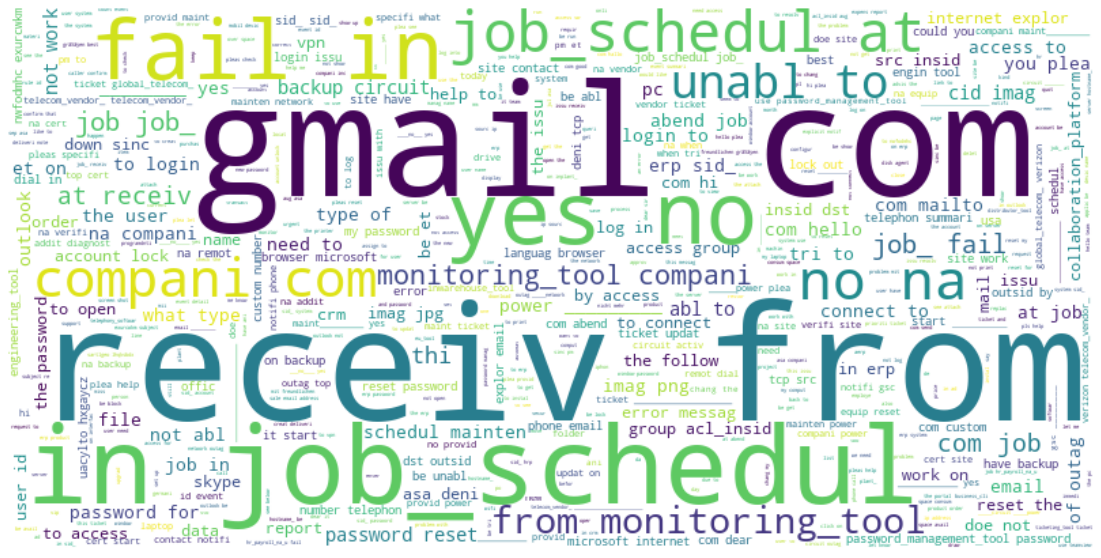

In [113]:
get_wordcloud_image('GRP_0')

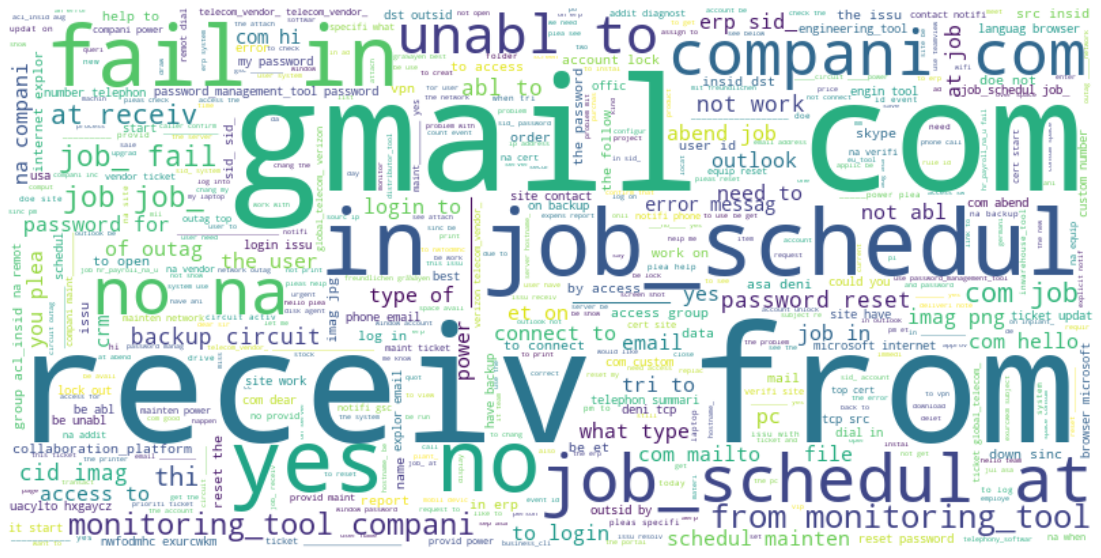

In [114]:
get_wordcloud_image('GRP_8')

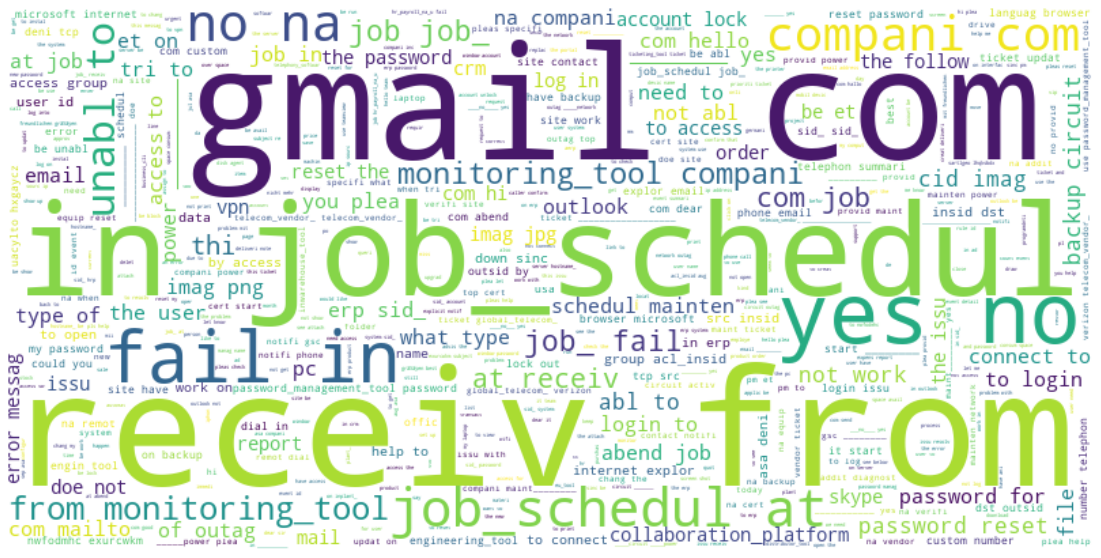

In [115]:
get_wordcloud_image('GRP_24')

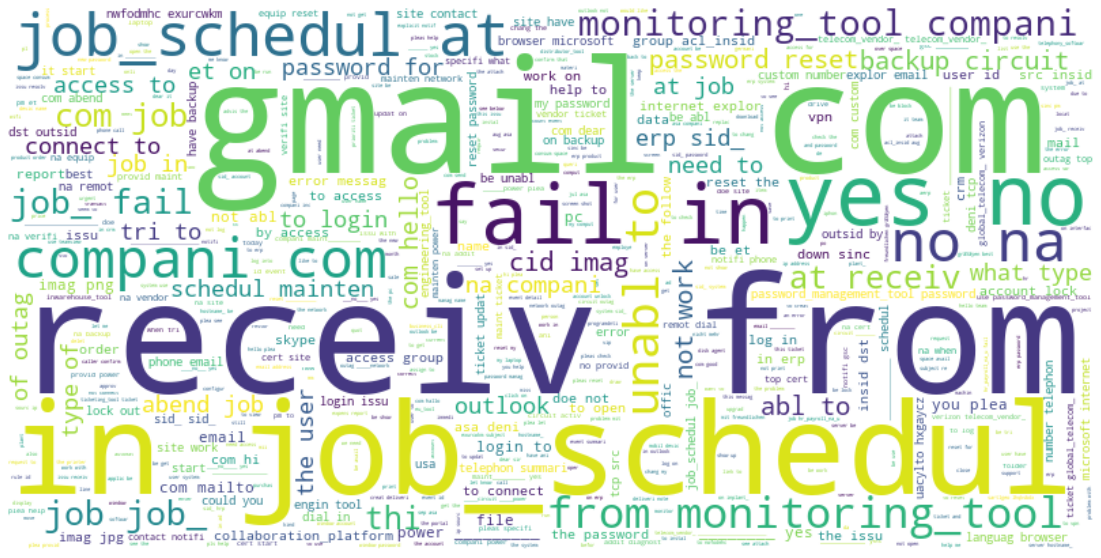

In [151]:
get_wordcloud_image('GRP_12')

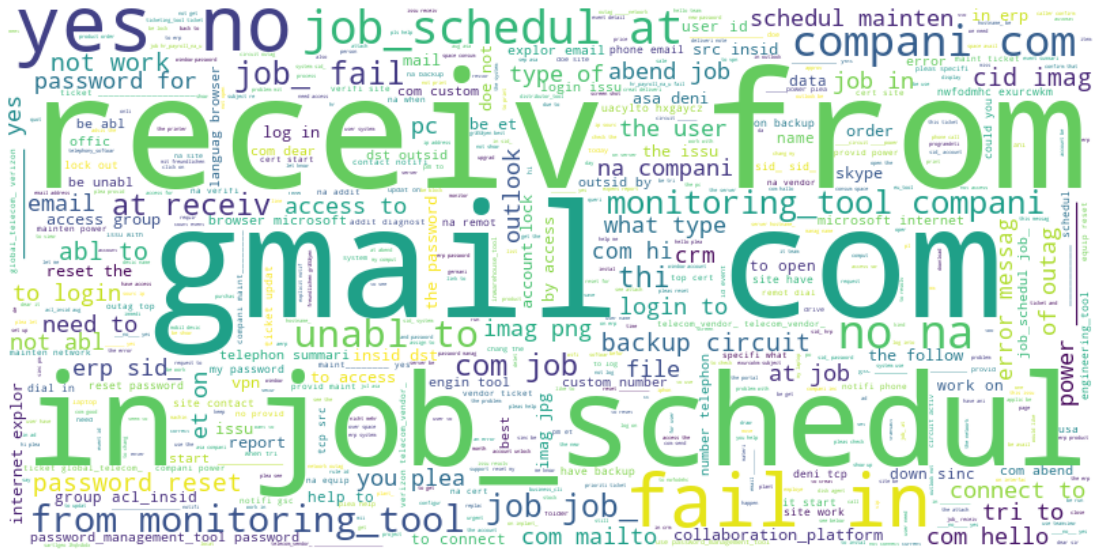

In [152]:
get_wordcloud_image('GRP_9')

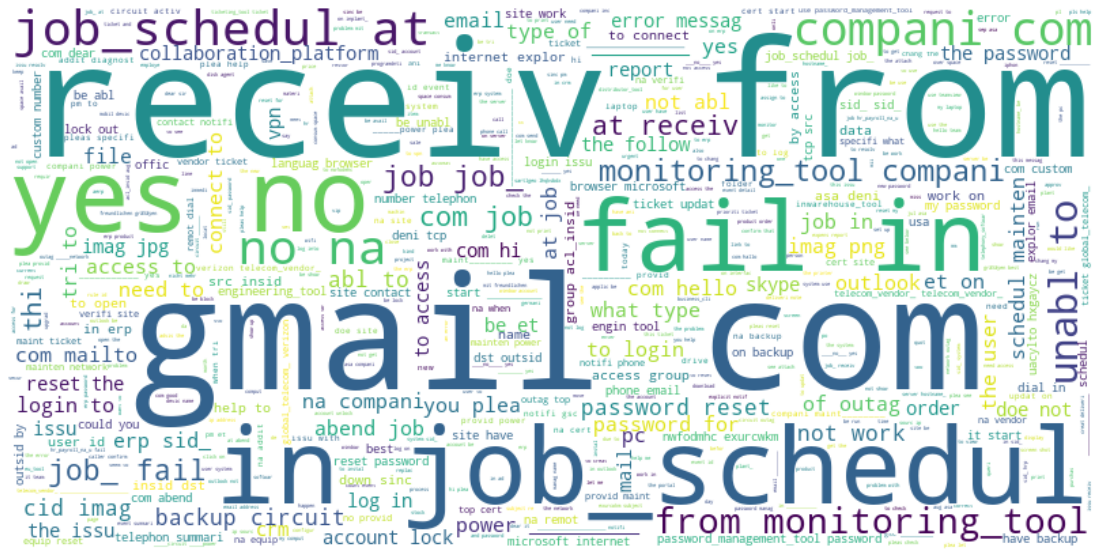

In [153]:
get_wordcloud_image('less_pop')

## Join tokens for TFIDF

In [123]:
def merge_tokens(tokens_list):
  merge_output = " "
  for token in tokens_list: 
    merge_output = merge_output + " " + token
  return merge_output

In [124]:
model_data['final_process_description'] = model_data['tokens_desc_lemmatization'].apply(lambda v: merge_tokens(v))

In [125]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
desc_tfidf = vectorizer.fit_transform(model_data['final_process_description'])
# print(vectorizer.get_feature_names())
# print(desc_tfidf.shape)

In [126]:
print(desc_tfidf.shape)

(8491, 14302)


In [127]:
print(vectorizer.get_feature_names())

['__', '___', '____', '_____', '______', '_______', '________', '_________', '__________', '___________', '____________', '_____________', '______________', '_______________', '________________', '_________________', '__________________', '___________________', '____________________', '_____________________', '_______________________', '_________________________', '___________________________', '________________________________', '_________________________________', '_____________________________________________', '___________________________________________________________________________', '____________na_____________', '___________global_telecom_', '___________na______________', '___________swisscom______________', '__________no_______________', '_________na__', '_________na________________', '_________oct', '________at', '________global_telecom_', '________na___', '________na_________________', '_______na', '_______na_', '_______na____', '_______no__', '_______no____', '_______yes_

In [128]:
# English we remove non ascii
import re
model_data['final_process_description'] = model_data['final_process_description'].apply(
    lambda v: re.sub(r'[^\x00-\x7F]+',' ', v))

In [129]:
vectorizer = TfidfVectorizer()
description_vectorizer = vectorizer.fit_transform(model_data['final_process_description'])

In [130]:
print(description_vectorizer)

  (0, 9819)	0.16290412326458273
  (0, 230)	0.14517713319384068
  (0, 1203)	0.07234039067836692
  (0, 5137)	0.16961204382945785
  (0, 11459)	0.12991802184803924
  (0, 2278)	0.17442299622255303
  (0, 1795)	0.19975247046691277
  (0, 11627)	0.13708545316376802
  (0, 363)	0.18047110652259055
  (0, 8641)	0.11076563684486455
  (0, 9812)	0.11681114506517465
  (0, 605)	0.1925811145465633
  (0, 322)	0.1720326144635177
  (0, 5659)	0.07434660362459442
  (0, 11463)	0.23506702646466335
  (0, 2007)	0.2912670360877012
  (0, 7838)	0.2723382795393243
  (0, 7232)	0.15432965443366758
  (0, 3654)	0.17589519479881435
  (0, 2881)	0.164427567531512
  (0, 12137)	0.357670596641978
  (0, 12309)	0.16802764210760893
  (0, 5882)	0.22580119295357695
  (0, 6983)	0.4224844007731926
  (1, 6393)	0.1702024176550869
  :	:
  (8489, 4507)	0.34387803557710434
  (8489, 346)	0.3116791627669808
  (8489, 3850)	0.26661354088148936
  (8489, 7163)	0.47139124191103854
  (8489, 4293)	0.2888336989394089
  (8489, 12162)	0.2566348261292

In [131]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

def create_bag_of_words(X):
    
    vectorizer = CountVectorizer(analyzer = "word", tokenizer = None, preprocessor = None, 
                                 stop_words = 'english', ngram_range = (1,3), max_features = 10000) 
    train_data_features = vectorizer.fit_transform(X)
    train_data_features = train_data_features.toarray()
    
    # tfidf transform
    
    tfidf = TfidfTransformer()
    tfidf_features = tfidf.fit_transform(train_data_features).toarray()

    # Get words in the vocabulary
    vocab = vectorizer.get_feature_names()

      
    return vectorizer, vocab, train_data_features, tfidf_features, tfidf

In [132]:
vectorizer, vocab, train_data_features, tfidf_features, tfidf  =  create_bag_of_words(
    model_data['final_process_description'])

# Logistic Regression

In [133]:
from sklearn.model_selection import train_test_split
X = model_data['final_process_description']
y = model_data['updated_target']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25)

In [134]:
vectorizer, vocab, train_data_features, tfidf_features, tfidf  =  create_bag_of_words(X_train)

In [135]:
def train_logistic_regression(features, label):
    print ("Training the logistic regression model...")
    from sklearn.linear_model import LogisticRegression
    ml_model = LogisticRegression(C = 100,random_state = 0)
    ml_model.fit(features, label)
    print ('Finished')
    return ml_model

In [136]:
logistic_model = train_logistic_regression(tfidf_features, y_train)

Training the logistic regression model...
Finished


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [137]:
test_data_features = vectorizer.transform(X_test)
# Convert to numpy array
test_data_features = test_data_features.toarray()

In [138]:
test_data_tfidf_features = tfidf.fit_transform(test_data_features)

# Convert to numpy array
test_data_tfidf_features = test_data_tfidf_features.toarray()

In [140]:
predicted_train_y = logistic_model.predict(tfidf_features)
correctly_identified_train_y = predicted_train_y == y_train
accuracy = np.mean(correctly_identified_train_y) * 100
print ('Training Accuracy = %.0f%%' %accuracy)

Training Accuracy = 94%


In [141]:
predicted_y = logistic_model.predict(test_data_tfidf_features)
correctly_identified_y = predicted_y == y_test
accuracy = np.mean(correctly_identified_y) * 100
print ('Test Accuracy = %.0f%%' %accuracy)

Test Accuracy = 67%


In [150]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predicted_y, target_names=targets_list))

              precision    recall  f1-score   support

       GRP_0       0.75      0.91      0.82       950
       GRP_1       0.50      0.33      0.40         9
       GRP_3       0.88      0.51      0.65        41
       GRP_4       0.33      0.50      0.40         2
       GRP_5       0.54      0.58      0.56        64
       GRP_6       0.58      0.54      0.56        39
       GRP_7       0.73      0.23      0.35        35
       GRP_8       0.80      0.40      0.53        10
       GRP_9       0.64      0.36      0.46        25
      GRP_10       1.00      0.95      0.98        22
      GRP_11       0.48      0.43      0.45        23
      GRP_12       0.39      0.37      0.38        54
      GRP_13       0.56      0.54      0.55        61
      GRP_14       0.00      0.00      0.00         9
      GRP_15       0.00      0.00      0.00         6
      GRP_16       0.00      0.00      0.00        10
      GRP_17       0.43      0.75      0.55         4
      GRP_18       0.90    

/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
